In [1]:
import numpy as np
import pandas as pd
import random
!ls

Activity 10.2.4.ipynb yield.csv


In [4]:
df = pd.read_csv('yield.csv')
df.head()

,Date,Yield
0,1971-08-16,0.5632
1,1971-08-17,0.7108
2,1971-08-18,1.0657
3,1971-08-19,1.1335
4,1971-08-20,1.0313


<AxesSubplot:>

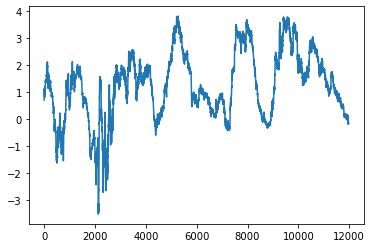

In [19]:
df.Yield.plot()

In [5]:
from statsmodels.tsa.stattools import adfuller

def is_stationary(series_x): 
    """
    Input expected: Pandas series
    """
    series_x.plot(title=series_x.name)
    
    result = adfuller(series_x)
    # Access the contents of the results:
    print('ADF Statistic: %f' % result[0])
    print('p-value:        %f ' % result[1])
    print('Lags used:      %d' % result[2])
    print('Critical Values:')
    for key, value in result[4].items():
        print((key, value))
    

    p_value = result[1]
    if p_value <= 0.05: 
        return True 
    elif p_value > 0.05: 
        return False

ADF Statistic: -3.393721
p-value:        0.011175 
Lags used:      31
Critical Values:
('1%', -3.430897660224935)
('5%', -2.861782037578331)
('10%', -2.566898831549907)


True

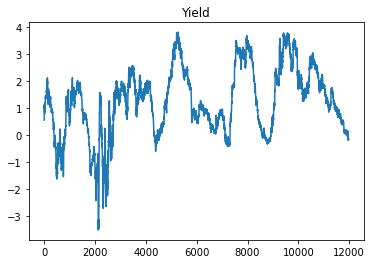

In [7]:
is_stationary(df['Yield'])

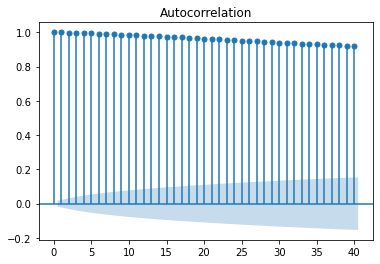

In [22]:
 # Plot the autocorrelation of the yield data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Yield'], lags=40);

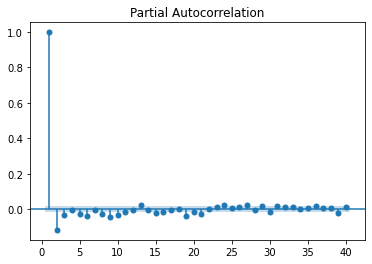

In [23]:
 # Plot the partial autocorrelation of the yield data
plot_pacf(df['Yield'], zero=False, lags=40);

In [29]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(df['Yield'].values, order=(2, 2))
result = model.fit()
result.summary()

/opt/anaconda3/envs/masterenv/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.44233D+00    |proj g|=  5.60196D-04

At iterate    5    f= -1.44233D+00    |proj g|=  7.91278D-04

At iterate   10    f= -1.44236D+00    |proj g|=  3.34621D-04

At iterate   15    f= -1.44381D+00    |proj g|=  3.34066D-03

At iterate   20    f= -1.44434D+00    |proj g|=  5.73119D-04

At iterate   25    f= -1.44435D+00    |proj g|=  8.02691D-05

At iterate   30    f= -1.44435D+00    |proj g|=  1.14131D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                11974
Model:                     ARMA(2, 2)   Log Likelihood               17294.609
Method:                       css-mle   S.D. of innovations              0.057
Date:                Mon, 25 Apr 2022   AIC                         -34577.218
Time:                        20:49:09   BIC                         -34532.876
Sample:                             0   HQIC                        -34562.342
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1877      0.318      3.733      0.000       0.564       1.811
ar.L1.y        1.9152      0.004    483.055      0.000       1.907       1.923
ar.L2.y       -0.9154      0.004   -231.261      0.000      -0.923      -0.908
ma.L1.y       -0.8043      0.010    -81.217      0.000      -0.824      -0.785
ma.L2.y       -0.0686      0.009     -7.571      0.000      -0.086      -0.051
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0025           +0.0000j            1.0025            0.0000
AR.2            1.0898           +0.0000j            1.0898            0.0000
MA.1            1.1337           +0.0000j            1.1337            0.0000
MA.2          -12.8523           +0.0000j           12.8523            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Yield Forecast'}>

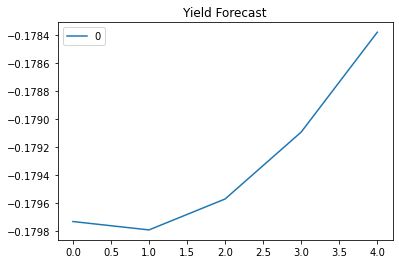

In [30]:
# Forecasting the future
pd.DataFrame(result.forecast(steps=5)[0]).plot(title="Yield Forecast")